# import statements


In [1]:
import cv2
import numpy as np
import random
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt
import os

import pandas as pd
import shutil
from utils import visualize_image


# draw junctions


In [2]:
#in a circular region randomly place connection point of the junction
def non_uniform_distribution_circle(r, x, y):
    r = r*random.random()
    theta = 2*np.pi*random.random()
    return int(x+r*np.cos(theta)), int(y+r*np.sin(theta))


#draw the junctions based on x and y, randomly select which junction
def draw_t_junction(size, x_center, y_center, perturbation_amount=2):
    image = np.zeros((size, size, 3), dtype=np.uint8)
    t = 2
    rand_junc = random.randint(0,8)

    junction_lst = [[0,1,0,1],
                    [0,1,1,0],
                    [0,1,1,1],
                    [1,0,0,1],
                    [1,0,1,0],
                    [1,0,1,1],
                    [1,1,0,1],
                    [1,1,1,0],
                    [1,1,1,1]]
    junction = junction_lst[rand_junc]

    # Random perturbations for line endpoints
    x_perturbation = np.random.randint(-perturbation_amount, perturbation_amount) 
    y_perturbation = np.random.randint(-perturbation_amount, perturbation_amount)  

    # Draw vertical line
    if junction[0] == 1:
        end_x = x_center + x_perturbation
        end_y = size
        cv2.line(image, (x_center, y_center), (end_x, end_y), (255, 255, 255), thickness=t)  # Top
    if junction[1] == 1:
        end_x = x_center + x_perturbation
        end_y = 0
        cv2.line(image, (x_center, y_center), (end_x, end_y), (255, 255, 255), thickness=t)  # bottom
    if junction[2] == 1:
        end_x = 0
        end_y = y_center + y_perturbation
        cv2.line(image, (x_center, y_center), (end_x, end_y), (255, 255, 255), thickness=t)  # left
    if junction[3] == 1:
        end_x = size
        end_y = y_center + y_perturbation
        cv2.line(image, (x_center, y_center), (end_x, end_y), (255, 255, 255), thickness=t)  # right

    image = cv2.GaussianBlur(image, (3, 3), 0)  # Adjust kernel size as needed

    return image, junction

def add_gaussian_noise(image, mean=0, sigma=25):
    """
    Add Gaussian noise to an image.
    :param image: Input image.
    :param mean: Mean of the Gaussian noise.
    :param sigma: Standard deviation of the Gaussian noise.
    :return: Noisy image.
    """
    row, col, ch = image.shape
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    gauss = gauss.reshape(row, col, ch)
    noisy_image = image + gauss
    noisy_image = np.clip(noisy_image, 0, 255)  # Ensure the values are within range
    noisy_image = noisy_image.astype(np.uint8)
    return noisy_image

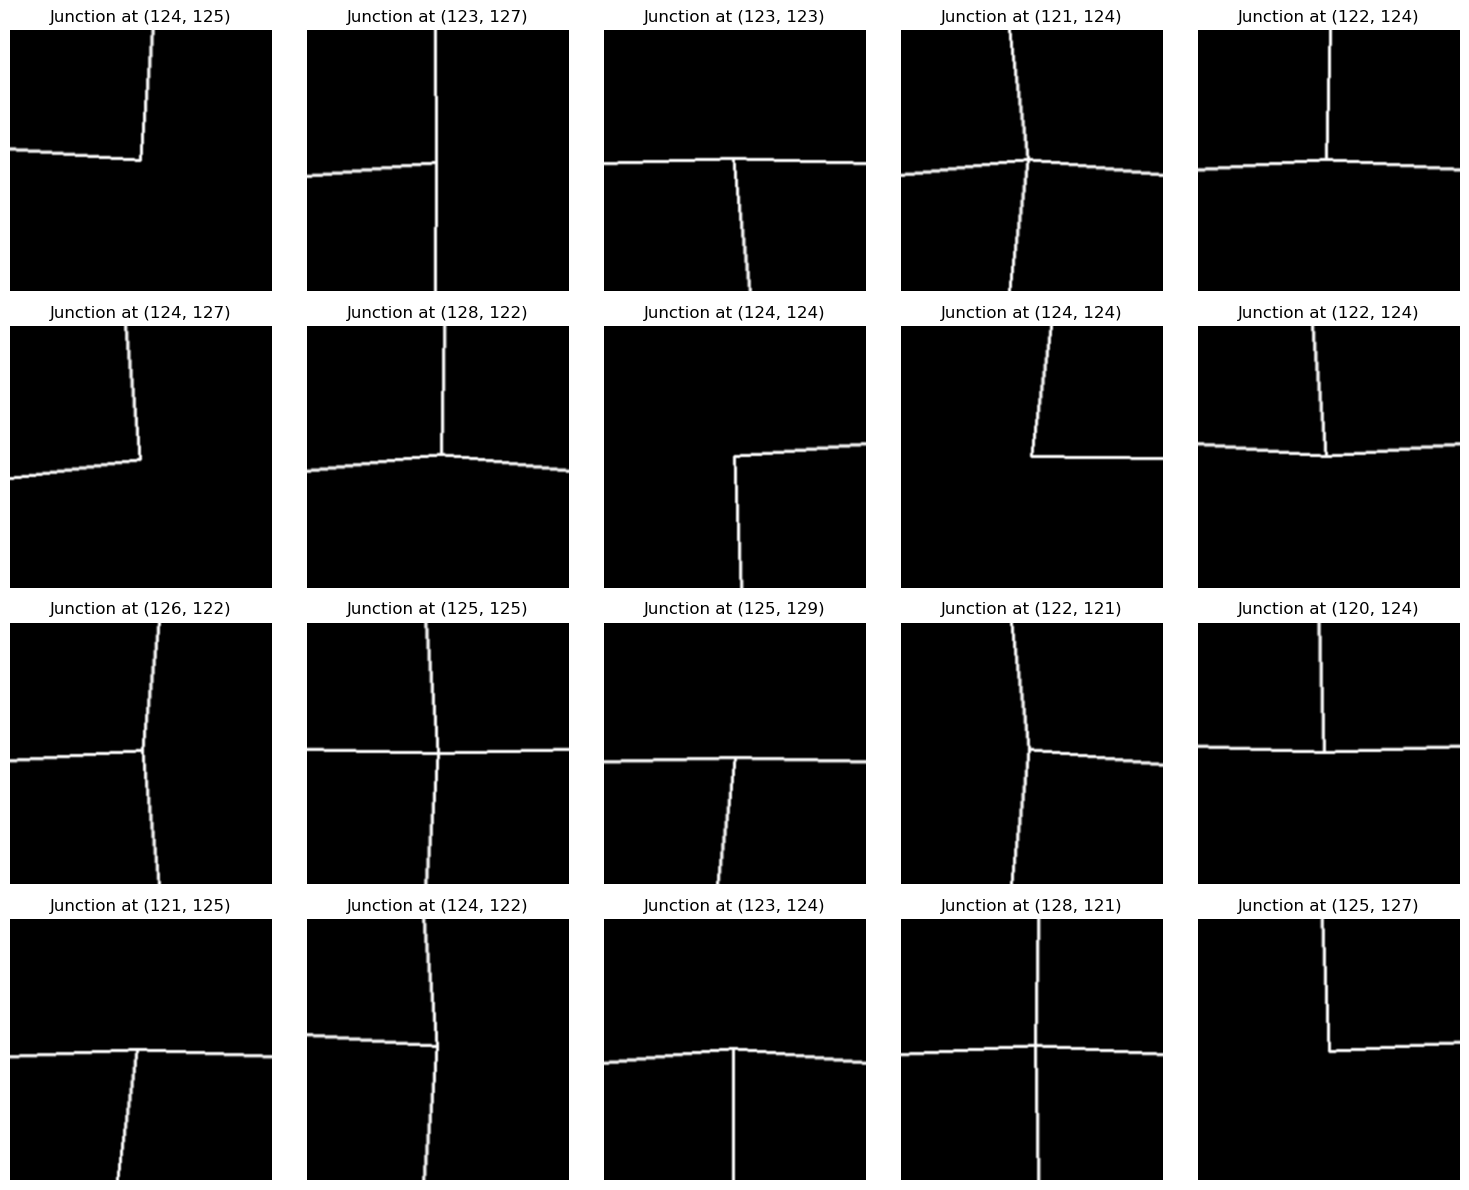

In [3]:

size = 250  # Size of the junction images

fig, axs = plt.subplots(4, 5, figsize=(15, 12))  # To show 20 images in a grid
axs = axs.ravel()

for i in range(20):
    x, y = non_uniform_distribution_circle(5, size//2, size//2)
    # print(x,y)
    # t_junction_img = draw_t_junction(size)
    t_junction_img, junc = draw_t_junction(size, x, y, perturbation_amount=20)

    # Save or display images
    cv2.imwrite('t_junction.jpg', t_junction_img)
    axs[i].imshow(cv2.cvtColor(t_junction_img, cv2.COLOR_BGR2RGB))
    axs[i].set_title(f"Junction at ({x}, {y})")
    axs[i].axis('off')

plt.tight_layout()
plt.show()


In [4]:
# fig, axs = plt.subplots(1, 2, figsize=(15, 12))  # To show 20 images in a grid
# axs = axs.ravel()

# x, y = non_uniform_distribution_circle(5, 12,12)
# original_img = draw_t_junction(size, x, y)
# noisy_img = add_gaussian_noise(original_img)


#  # Save or display images
# cv2.imwrite('t_junction.jpg', original_img)
# axs[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))

#  # Save or display images
# cv2.imwrite('t_junction.jpg', noisy_img)
# axs[1].imshow(cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB))

# plt.tight_layout()
# plt.show()

# Generate junction datset
Should be about 200 per component thus 1600 junctions

In [5]:
junction_lst = [[0,1,0,1],
                    [0,1,1,0],
                    [0,1,1,1],
                    [1,0,0,1],
                    [1,0,1,0],
                    [1,0,1,1],
                    [1,1,0,1],
                    [1,1,1,0],
                    [1,1,1,1]]


base_dir = '../dataset/junctions'
folders = set()
for junc in junction_lst:
    a,b,c,d = junc
    string = 'junction'+str(a)+str(b)+str(c)+str(d)
    folders.add(string)
    print(string)


# Ensure base directory and all necessary subdirectories exist
if not os.path.exists(base_dir):
    os.makedirs(base_dir)

for folder in folders:
    folder_path = base_dir+"/"+folder
    
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    else:
        for file in os.listdir(folder_path):
            os.remove(os.path.join(folder_path,file))  # remove any existing files in the folder


junction0101
junction0110
junction0111
junction1001
junction1010
junction1011
junction1101
junction1110
junction1111


In [6]:

# size = 25  # Size of the junction images

# fig, axs = plt.subplots(4, 5, figsize=(15, 12))  # To show 20 images in a grid
# axs = axs.ravel()
all_junc = {"junction0101":0,"junction0110":0,"junction0111":0,"junction1001":0,"junction1010":0,"junction1011":0,"junction1101":0,"junction1110":0,"junction1111":0}

number_of_samples = 100
for i in range(number_of_samples):
    x, y = non_uniform_distribution_circle(5, 12,12)
    # print(x,y)
    # t_junction_img = draw_t_junction(size)
    t_junction_img, junction = draw_t_junction(size, x, y, perturbation_amount=20)
    # noisy_img = add_gaussian_noise(t_junction_img)

    a,b,c,d = junction
    folder_name = 'junction'+str(a)+str(b)+str(c)+str(d)

    all_junc[folder_name]+=1

    num = all_junc[folder_name]

    
    destination_path =os.path.join(base_dir, folder_name)

    cv2.imwrite(os.path.join(destination_path,str(num)+'.jpg'), t_junction_img)
    


print(all_junc)



{'junction0101': 14, 'junction0110': 6, 'junction0111': 10, 'junction1001': 12, 'junction1010': 11, 'junction1011': 13, 'junction1101': 12, 'junction1110': 13, 'junction1111': 9}


In [7]:
# Parameters
min_image_size = 800        # Minimum image size (pixels)
max_image_size = 1200       # Maximum image size (pixels)

min_component_size = 80     # Minimum component size (pixels)
max_component_size = 160    # Maximum component size (pixels)

uses_per_component = 3      # Number of times each component is used

val_ratio = 0.15            # Validation set ratio (0-1)


# Define the images and labels folder paths
components_dataset = '../dataset/junctions'
images_folder = os.path.join(components_dataset, 'images')
labels_folder = os.path.join(components_dataset, 'labels')

train_images_folder = os.path.join(components_dataset, 'images/train')
val_images_folder = os.path.join(components_dataset, 'images/val')

# Define the labels folder paths
train_labels_folder = os.path.join(components_dataset, 'labels/train')
val_labels_folder = os.path.join(components_dataset, 'labels/val')


In [8]:
# Check if the train labels folder exists, if not create it
if not os.path.exists(train_labels_folder):
    os.makedirs(train_labels_folder)

# Check if the val labels folder exists, if not create it
if not os.path.exists(val_labels_folder):
    os.makedirs(val_labels_folder)

# Check if the images folder exists, if not create it
if not os.path.exists(images_folder):
    os.makedirs(images_folder)
    os.makedirs(images_folder+"/val")
    os.makedirs(images_folder+"/train")

# Check if the labels folder exists, if not create it
if not os.path.exists(labels_folder):
    os.makedirs(labels_folder)
    os.makedirs(labels_folder+"/val")
    os.makedirs(labels_folder+"/train")


# Get component folders
folders = os.listdir(components_dataset)
folders = [f for f in folders if f not in ['images', 'labels']]
folders.sort()

# Save original folders for later
original_folders = folders.copy()
print(original_folders)

# Check if the train labels folder exists
if os.path.exists(train_labels_folder):
    # Remove all files in the train labels folder
    for file in os.listdir(train_labels_folder):
        os.remove(os.path.join(train_labels_folder, file))

# Check if the val labels folder exists
if os.path.exists(val_labels_folder):
    # Remove all files in the val labels folder
    for file in os.listdir(val_labels_folder):
        os.remove(os.path.join(val_labels_folder, file))

if os.path.exists(train_images_folder):
    # Remove all files in the train labels folder
    for file in os.listdir(train_images_folder):
        os.remove(os.path.join(train_images_folder, file))

# Check if the val labels folder exists
if os.path.exists(val_images_folder):
    # Remove all files in the val labels folder
    for file in os.listdir(val_images_folder):
        os.remove(os.path.join(val_images_folder, file))


['junction0101', 'junction0110', 'junction0111', 'junction1001', 'junction1010', 'junction1011', 'junction1101', 'junction1110', 'junction1111', 'junctions.yaml', 'junctions.zip']


In [10]:
# Total number of components
total_components = 0

# Placed components
placed_components = []

# Image number
image_number = 0

while total_components < uses_per_component*number_of_samples or image_number == 1500: # all components sum to 135
    if total_components < uses_per_component*(1-val_ratio)*number_of_samples:
        folder_type = 'train'
    else:
        folder_type = 'val'
    
    # Output paths
    output_image_path = os.path.join(components_dataset, 'images', folder_type, f'image_{image_number}.jpg')
    output_label_path = os.path.join(components_dataset, 'labels', folder_type, f'image_{image_number}.txt')

    # Create a bigger image
    image_size = (random.randint(min_image_size, max_image_size), random.randint(min_image_size, max_image_size))
    bigger_image = np.zeros((image_size[1], image_size[0], 3), dtype=np.uint8)


    # Randomly select number of components to place on the image
    max_num_components_on_image = random.randint(3, 7)
    num_components_on_image = 0
    
    # Randomly shuffle the order of the folders
    random.shuffle(folders)

    # Save component location to prevent overlapping
    component_locations = []

    # Randomly select components from selected folders
    for folder in folders:
        folder_path = os.path.join(components_dataset, folder)
        
        components = os.listdir(folder_path)
        random.shuffle(components)
        
        # Paste components onto the bigger image and generate labels
        for component in components:
            component_path = os.path.join(folder_path, component)

            # Check how many times this component has been placed
            count = placed_components.count(component_path)

            # If the component has been placed more than 3 times, skip it
            if count >= uses_per_component:
                continue

            # Add the component to the list of placed components
            placed_components.append(component_path)
            num_components_on_image += 1
            total_components += 1

            component_image = cv2.imread(component_path)
            component_image_size = random.randint(min_component_size, max_component_size)
            component_image = cv2.resize(component_image, (component_image_size, component_image_size))

            # Randomly rotate the component (steps of 90 degrees)
            if 'battery' in component_path or 'cap' in component_path or 'dc_volt_src_2' in component_path or 'diode' in component_path or 'inductor' in component_path or 'resistor' in component_path:
                rotation = random.randint(0, 3)
                component_image = np.rot90(component_image, rotation)
            
            # Randomly select position to paste the component
            x = random.randint(0, image_size[0] - component_image.shape[1])
            y = random.randint(0, image_size[1] - component_image.shape[0])

            # Check if the component overlaps with other components
            overlap = False
            if len(component_locations) != 0:
                for loc in component_locations:
                    if (x < loc[0] + loc[2] and x > loc[0] - component_image.shape[1]) and (y < loc[1] + loc[3] and y > loc[1] - component_image.shape[0]):
                        overlap = True
                        break

            if overlap:
                continue

            # Save component location
            component_locations.append((x, y, component_image.shape[1], component_image.shape[0]))
            
            # Paste component onto the bigger image
            bigger_image[y:y+component_image.shape[0], x:x+component_image.shape[1]] = component_image

            # Generate label in YOLO format
            class_label = original_folders.index(folder)
            label = [class_label, 0, 0, 0, 0]

            # # Find the bounding box coordinates
            # nonzero_pixels = np.nonzero(bigger_image[y:y+component_image.shape[0], x:x+component_image.shape[1]])
            # min_x = np.min(nonzero_pixels[1])
            # max_x = np.max(nonzero_pixels[1])
            # min_y = np.min(nonzero_pixels[0])
            # max_y = np.max(nonzero_pixels[0])

            # # Adjust the label coordinates based on the bounding box
            # label[1] = (x + (min_x + max_x) / 2) / image_size[0]
            # label[2] = (y + (min_y + max_y) / 2) / image_size[1]
            # label[3] = (max_x - min_x) / image_size[0]
            # label[4] = (max_y - min_y) / image_size[1]

            # Find the center 10% region
            center_x = x + component_image.shape[1] // 2
            center_y = y + component_image.shape[0] // 2
            center_width = component_image.shape[1] * 0.1
            center_height = component_image.shape[0] * 0.1
            min_x = center_x - center_width // 2
            max_x = center_x + center_width // 2
            min_y = center_y - center_height // 2
            max_y = center_y + center_height // 2

            # Adjust the label coordinates based on the center region
            label[1] = (min_x + center_width / 2) / image_size[0]
            label[2] = (min_y + center_height / 2) / image_size[1]
            label[3] = center_width / image_size[0]
            label[4] = center_height / image_size[1]

            # Create new .txt file to save the label
            with open(output_label_path, 'a') as f:
                f.write(' '.join(map(str, label)) + '\n')

            break  # Only place one component from each folder

        if num_components_on_image >= max_num_components_on_image:
            break

    # Now add noise
    noise = np.random.randint(0, 256, bigger_image.shape)

    # Add noise to the image
    bigger_image = cv2.addWeighted(bigger_image, 0.75, noise, 0.25, 0, dtype=cv2.CV_8U)

    # To grayscale
    bigger_image = cv2.cvtColor(bigger_image, cv2.COLOR_BGR2GRAY)
    
    # Save the output image
    print(f"saving image to: {output_image_path}")
    cv2.imwrite(output_image_path, bigger_image)

    image_number += 1

saving image to: ../dataset/junctions/images/train/image_0.jpg
saving image to: ../dataset/junctions/images/train/image_1.jpg
saving image to: ../dataset/junctions/images/train/image_2.jpg
saving image to: ../dataset/junctions/images/train/image_3.jpg
saving image to: ../dataset/junctions/images/train/image_4.jpg
saving image to: ../dataset/junctions/images/train/image_5.jpg
saving image to: ../dataset/junctions/images/train/image_6.jpg
saving image to: ../dataset/junctions/images/train/image_7.jpg
saving image to: ../dataset/junctions/images/train/image_8.jpg
saving image to: ../dataset/junctions/images/train/image_9.jpg
saving image to: ../dataset/junctions/images/train/image_10.jpg
saving image to: ../dataset/junctions/images/train/image_11.jpg
saving image to: ../dataset/junctions/images/train/image_12.jpg
saving image to: ../dataset/junctions/images/train/image_13.jpg
saving image to: ../dataset/junctions/images/train/image_14.jpg
saving image to: ../dataset/junctions/images/train

KeyboardInterrupt: 

In [ ]:
# Randomly select an image
image_files = os.listdir(images_folder+"/train")
random.shuffle(image_files)
image_file = image_files[0]

# Get the image and label paths
output_image_path = os.path.join(images_folder+"/train", image_file)
output_label_path = os.path.join(labels_folder+"/train", image_file.replace('.jpg', '.txt'))

print(output_image_path)
print(output_label_path)
# Visualize the output image
visualize_image(output_image_path, output_label_path)


In [ ]:

size = 25  # Size of the junction images

fig, axs = plt.subplots(4, 5, figsize=(15, 12))  # To show 20 images in a grid
axs = axs.ravel()

for i in range(20):
    # Save or display images
    cv2.imwrite('t_junction.jpg', t_junction_img)
    axs[i].imshow(cv2.cvtColor(t_junction_img, cv2.COLOR_BGR2RGB))
    axs[i].set_title(f"Junction at ({x}, {y})")
    axs[i].axis('off')

plt.tight_layout()
plt.show()
